# Data Loading

**Downloading the files**

- GCI: http://www3.weforum.org/docs/GCR2017-2018/GCI_Dataset_2007-2017.xlsx
- Worldbank: https://databank.worldbank.org/source/world-development-indicators
    - select countries
    - select series 
    - select time
    - click on download options
    - advanced options
    - Excel, Metadata yes

- UNDP: https://hdr.undp.org/en/indicators/137506

In [202]:
import numpy as np
import pandas as pd
import klib
import miceforest as mf

In [203]:
# Dictionary for matching different namings of countries to one 
countries_dict = {'Bahamas': 'Bahamas', 
                'Bahamas, The':'Bahamas',
                'The Bahamas':'Bahamas',
                'Brunei Darussalam':'Brunei',
                'Bolivia':'Bolivia',
                'Bolivia (Plurinational State of)':'Bolivia',
                'Congo':'Congo',
                'Congo, Rep': 'Congo',
                'Congo (Democratic Republic of the)':'DR Congo', 
                'Congo, Dem. Rep.':'DR Congo',
                'Congo, Democratic Rep.':'DR Congo',
                'Côte d\'Ivoire':'Cote d\'Ivoire',
                'Cote d\'Ivoire':'Cote d\'Ivoire',
                'Czechia':'Czech',
                'Czech Republic':'Czech',
                'Curaçao':'Curacao',
                'Egypt':'Egypt',
                'Egypt, Arab Rep.':'Egypt',
                'Eswatini':'Eswatini',
                'Eswatini (Kingdom of)':'Eswatini',
                'Gambia':'Gambia',
                'The Gambia':'Gambia',
                'Gambia, The':'Gambia',
                'Hong Kong SAR':'Hong Kong',
                'Hong Kong SAR, China':'Hong Kong',
                'Hong Kong, China (SAR)':'Hong Kong',
                'Hong':'Hong Kong',
                'Kyrgyz Republic':'Kyrgyzstan',
                'Iran (Islamic Republic of)':'Iran',
                'Iran, Islamic Rep.':'Iran',
                'Korea':'Korea, Rep.',
                'Korea (Republic of)':'Korea, Rep.',
                'Dem. People\'s Rep. Korea':'"Korea, Dem. People\'s Rep.',
                'Lao People\'s Democratic Republic':'Lao PDR',
                'Saint Lucia':'St. Lucia',
                'Moldova (Republic of)':'Moldova',
                'Micronesia (Federated States of)':'Micronesia',
                'Micronesia, Fed. Sts.':'Micronesia',
                'Saint Kitts and Nevis':'St. Kitts and Nevis',
                'Slovak Republic':'Slovakia',
                'Syrian Arab Republic':'Syria',
                'Tanzania (United Republic of)':'Tanzania',
                'Venezuela (Bolivarian Republic of)':'Venezuela',
                'Venezuela, RB':'Venezuela',
                'Viet Nam':'Vietnam',
                'Saint Vincent':'St. Vincent',
                'Yemen, Rep.':'Yemen',
                'Swaziland': 'Eswatini',
                'São Tomé and Principe':'Sao Tome and Principe',
                'Russian Federation':'Russia',
                'Macedonia, FYR':'North Macedonia' 
                }

#Datasets contain regions as well as countries
regions=['Arab States', 'Eurasia', 'Europe and Central Asia', 'Europe and North America','Latin America and the Caribbean','Middle East and North Africa', 
'Organization for Economic Co-operation and Development', 'Sub-Saharan Africa']

#Datasets label and group countries into buckets
designations =['Very high human development','South Asia','Small Island Developing States','Least Developed Countries','Low human development',
'Medium human development','High human development','Human Development']



Helper functions

In [204]:
#function to unify the names of the countries. 
def unify_countries(original, replacement_dict):
    ### original: original text of country name
    ### replacement_dict: the dictionary of different variations of country names and the unified name
    if original.strip() in replacement_dict:
        return replacement_dict[original.strip()]
    else:
        return original.strip()

#fucntion to rename the series codes to more readable names
def rename_indicators(x,y,val):
    if val == np.nan:
        return np.nan
    return x[y.index(val)]

#### Loading countries

In [205]:
#The world bank file has multiple sheets. 
# Loading the sheet with the countries and their meta data.
df_countries = pd.read_excel('data/World_Development_Indicators.xlsx',sheet_name='Country - Metadata')
df_countries.head()

,Code,Long Name,Income Group,Region,Lending category,Other groups,Currency Unit,Latest population census,Latest household survey,Special Notes,...,IMF data dissemination standard,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,2-alpha code,WB-2 code,Table Name,Short Name
0,AFG,Islamic State of Afghanistan,Low income,South Asia,IDA,HIPC,Afghan afghani,1979,"Demographic and Health Survey, 2015",Fiscal year end: March 20; reporting period fo...,...,Enhanced General Data Dissemination System (e-...,"Integrated household survey (IHS), 2016/17",NaN,NaN,NaN,2018.0,AF,AF,Afghanistan,Afghanistan
1,ALB,Republic of Albania,Upper middle income,Europe & Central Asia,IBRD,NaN,Albanian lek,2020 (expected),"Demographic and Health Survey, 2017/18",NaN,...,Enhanced General Data Dissemination System (e-...,Living Standards Measurement Study Survey (LSM...,Yes,2012,2013.0,2018.0,AL,AL,Albania,Albania
2,DZA,People's Democratic Republic of Algeria,Lower middle income,Middle East & North Africa,IBRD,NaN,Algerian dinar,2020 (expected),"Multiple Indicator Cluster Survey, 2018/19",NaN,...,Enhanced General Data Dissemination System (e-...,"Integrated household survey (IHS), 2011",NaN,NaN,2010.0,2017.0,DZ,DZ,Algeria,Algeria
3,ASM,American Samoa,Upper middle income,East Asia & Pacific,NaN,NaN,U.S. dollar,2020 (expected),NaN,NaN,...,NaN,NaN,Yes,2008,NaN,NaN,AS,AS,American Samoa,American Samoa
4,AND,Principality of Andorra,High income,Europe & Central Asia,NaN,NaN,Euro,2011. Population figures compiled from adminis...,NaN,NaN,...,NaN,NaN,Yes,NaN,NaN,2018.0,AD,AD,Andorra,Andorra


In [206]:
#We are only interested in the name, income group, and region
df_countries = df_countries[['Short Name','Income Group', 'Region']]

#renaming columns 
df_countries.columns = ['country','income_group', 'region']

In [207]:
#removing any empty rows read by pandas
df_countries.dropna(inplace=True)

#unifying country names
df_countries['country'] = df_countries['country'].apply(lambda x: unify_countries(x,countries_dict))

#### World Bank Indicators

In [208]:
#lists of original series name and clean, readable series name 
series_id = ['SE.XPD.TOTL.GD.ZS','HD.HCI.OVRL','NY.ADJ.AEDU.CD','SE.XPD.PRIM.PC.ZS','SE.XPD.SECO.PC.ZS','SE.XPD.TERT.PC.ZS','NY.GDP.PCAP.CD','NY.GDP.MKTP.CD','SP.POP.TOTL']
series_name = ['edu_exp_pct_gdp','hci_index','edu_exp_usd','edu_prim_exp_pct_gdp','edu_sec_exp_pct_gdp','edu_tert_exp_pct_gdp','gdppc','gdp','population']

In [209]:
#Now we are using the same datafile to get values of the indicators that we are interested 
df_wb_data = pd.read_excel('data/World_Development_Indicators.xlsx',sheet_name='Data')

#replacing .. with nan
df_wb_data.replace(to_replace='..',value=np.nan,inplace=True)

In [210]:
#removing any empty rows read by pandas
df_wb_data  = df_wb_data.iloc[0:-5,:]

#dropping the columns that we are not interseted in
df_wb_data.drop(columns=['Series Name','Country Code'],inplace=True)

In [211]:
#### DEFINE WHAT WE ARE DOING HERE ########### DEFINE WHAT WE ARE DOING HERE ########### DEFINE WHAT WE ARE DOING HERE #######
df_wb_data = df_wb_data.melt(id_vars=['Country Name','Series Code'],var_name='year')

#Renaming the columns
df_wb_data.columns = ['country','series_code','year','value']

Cleaning the columns

In [212]:
#changing the unreadable series codes to comprehendable namings in the indicators column
df_wb_data['indicator'] = df_wb_data['series_code'].apply(lambda val: rename_indicators(series_name,series_id,val))

#changing the year from a fiscal year or range to a specific calendar year
df_wb_data['year'] = df_wb_data['year'].apply(lambda val: val[0:4])

#unifying the names of the countries
df_wb_data['country'] = df_wb_data['country'].apply(lambda x: unify_countries(x,countries_dict))

#removing series_code after processing it
df_wb_data.drop(columns='series_code',axis=1, inplace=True)

In [213]:
#### DEFINE WHAT WE ARE DOING HERE ########### DEFINE WHAT WE ARE DOING HERE ########### DEFINE WHAT WE ARE DOING HERE #######
df_wb_data = df_wb_data.pivot(index=['country','year'],columns='indicator',values='value')

In [214]:
df_wb_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4340 entries, ('Afghanistan', '2001') to ('Zimbabwe', '2020')
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   edu_exp_pct_gdp       2448 non-null   float64
 1   edu_exp_usd           3491 non-null   float64
 2   edu_prim_exp_pct_gdp  1412 non-null   float64
 3   edu_sec_exp_pct_gdp   1274 non-null   float64
 4   edu_tert_exp_pct_gdp  1285 non-null   float64
 5   gdp                   4125 non-null   float64
 6   gdppc                 4125 non-null   float64
 7   hci_index             601 non-null    float64
 8   population            4331 non-null   float64
dtypes: float64(9)
memory usage: 328.5+ KB


#### UNDP - HDI

In [215]:
#reading the Human development index from the csv
df_hdi = pd.read_csv('data/Human Development Index (HDI).csv', skiprows=5)

#cleaning the dataframe from empty rows and columns read by pandas
df_hdi.dropna(axis=1,how='all',inplace=True)
df_hdi.dropna(axis=0,how='all',inplace=True)

#replacing .. with nan
df_hdi.replace('..',np.nan,inplace=True)

#droping the rank column as we are not interested in the rank
df_hdi.drop(columns='HDI Rank',inplace=True)

#clean column names
klib.clean_column_names(df_hdi)

#### DEFINE WHAT WE ARE DOING HERE ########### DEFINE WHAT WE ARE DOING HERE ########### DEFINE WHAT WE ARE DOING HERE #######
df_hdi = df_hdi.melt(id_vars=['country'],var_name='year',value_name='hdi_index')

#Unifying country names
df_hdi['country'] = df_hdi['country'].apply(lambda x: unify_countries(x,countries_dict))

In [216]:
df_hdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6180 entries, 0 to 6179
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   country    6180 non-null   object
 1   year       6180 non-null   object
 2   hdi_index  5602 non-null   object
dtypes: object(3)
memory usage: 145.0+ KB


#### GCI - Quality of Education Index

In [217]:
#reading the GCI 
df_gci = pd.read_excel('data/GCI_Dataset_2007-2017.xlsx',sheet_name='Data',skiprows=3)

In [218]:
#lists of original series name and clean, readable series name 
series_global_id = ['GCI.B.05.02']
series_rename = ['edu_quality_index']

In [219]:
#selecting the indicators that are of concern
df_gci = df_gci[df_gci['GLOBAL ID'].isin(series_global_id)]

#removing unneeded rows
df_gci = df_gci[df_gci['Attribute']=='Value']

#getting the year information
df_gci['year']= df_gci['Edition'].apply(lambda x: x[-4:])

#dropping unneeded columns
df_gci.drop(labels=['Placement','Dataset','Series','Code GCR','Series unindented','Edition','Attribute'],axis=1, inplace=True)


In [220]:
#### DEFINE WHAT WE ARE DOING HERE ########### DEFINE WHAT WE ARE DOING HERE ########### DEFINE WHAT WE ARE DOING HERE #######
df_gci = df_gci.melt(id_vars=['GLOBAL ID','year'], var_name=['country'])

#Unifying country names
df_gci['country'] = df_gci['country'].apply(lambda x: unify_countries(x,countries_dict))

In [221]:
#remaning the indicators to meaningful names
df_gci['indicator'] = df_gci['GLOBAL ID'].apply(lambda val: rename_indicators(series_rename,series_global_id,val))

#Dropping unneeded columns
df_gci.drop(columns='GLOBAL ID',inplace=True)

#### DEFINE WHAT WE ARE DOING HERE ########### DEFINE WHAT WE ARE DOING HERE ########### DEFINE WHAT WE ARE DOING HERE #######
df_gci = df_gci.pivot(index=['year','country'],columns='indicator',values='value')


In [222]:
df_gci.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1760 entries, ('2008', 'Albania') to ('2018', 'Zimbabwe')
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   edu_quality_index  1538 non-null   object
dtypes: object(1)
memory usage: 24.7+ KB


#### Joining the indicators together

In [223]:
#Merging the data frames together for analysis
df_indicators =df_wb_data.merge(df_gci, on=['country','year'],how='outer')
df_indicators = df_indicators.merge(df_hdi, on=['country','year'],how='outer')
df_indicators = df_indicators.merge(df_countries, on=['country'],how='inner')

In [224]:
#Removing the groupings from the dataframe
df_indicators = df_indicators[~df_indicators.country.isin(designations)]
df_indicators = df_indicators[~df_indicators.country.isin(regions)]

In [225]:
#checking the columns data types and non-null value counts
df_indicators.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6294 entries, 0 to 6293
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               6294 non-null   object 
 1   year                  6294 non-null   object 
 2   edu_exp_pct_gdp       2425 non-null   float64
 3   edu_exp_usd           3439 non-null   float64
 4   edu_prim_exp_pct_gdp  1403 non-null   float64
 5   edu_sec_exp_pct_gdp   1267 non-null   float64
 6   edu_tert_exp_pct_gdp  1281 non-null   float64
 7   gdp                   4053 non-null   float64
 8   gdppc                 4053 non-null   float64
 9   hci_index             594 non-null    float64
 10  population            4231 non-null   float64
 11  edu_quality_index     1492 non-null   object 
 12  hdi_index             5056 non-null   object 
 13  income_group          6294 non-null   object 
 14  region                6294 non-null   object 
dtypes: float64(9), object

In [226]:
#creating new metric
df_indicators['edu_exp_per_capita'] = df_indicators.apply(lambda row: row['edu_exp_usd']/row['population'] if row['edu_exp_usd'] != np.nan and row['population'] != np.nan else np.nan,axis=1)

In [227]:
#Adjusting the data types
df_indicators['hdi_index'] = df_indicators['hdi_index'].astype(float)
df_indicators['edu_quality_index'] = df_indicators['edu_quality_index'].astype(float)
df_indicators['year'] = df_indicators['year'].astype(int)

The years of the observations are not consistent across the datasets 

In [228]:
#Grouping by year and checking the number of values within each year ()
df_indicators.groupby('year').count()

,country,edu_exp_pct_gdp,edu_exp_usd,edu_prim_exp_pct_gdp,edu_sec_exp_pct_gdp,edu_tert_exp_pct_gdp,gdp,gdppc,hci_index,population,edu_quality_index,hdi_index,income_group,region,edu_exp_per_capita
year,,,,,,,,,,,,,,,
1990,185,0,0,0,0,0,0,0,0,0,0,142,185,185,0
1991,185,0,0,0,0,0,0,0,0,0,0,142,185,185,0
1992,185,0,0,0,0,0,0,0,0,0,0,142,185,185,0
1993,185,0,0,0,0,0,0,0,0,0,0,142,185,185,0
1994,185,0,0,0,0,0,0,0,0,0,0,142,185,185,0
1995,185,0,0,0,0,0,0,0,0,0,0,146,185,185,0
1996,185,0,0,0,0,0,0,0,0,0,0,146,185,185,0
1997,185,0,0,0,0,0,0,0,0,0,0,146,185,185,0
1998,185,0,0,0,0,0,0,0,0,0,0,146,185,185,0


In [229]:
df_indicators[['hdi_index','hci_index']].corr()

,hdi_index,hci_index
hdi_index,1.00000,0.93989
hci_index,0.93989,1.00000


high correlation keep it, consistent years

GridSpec(6, 6)

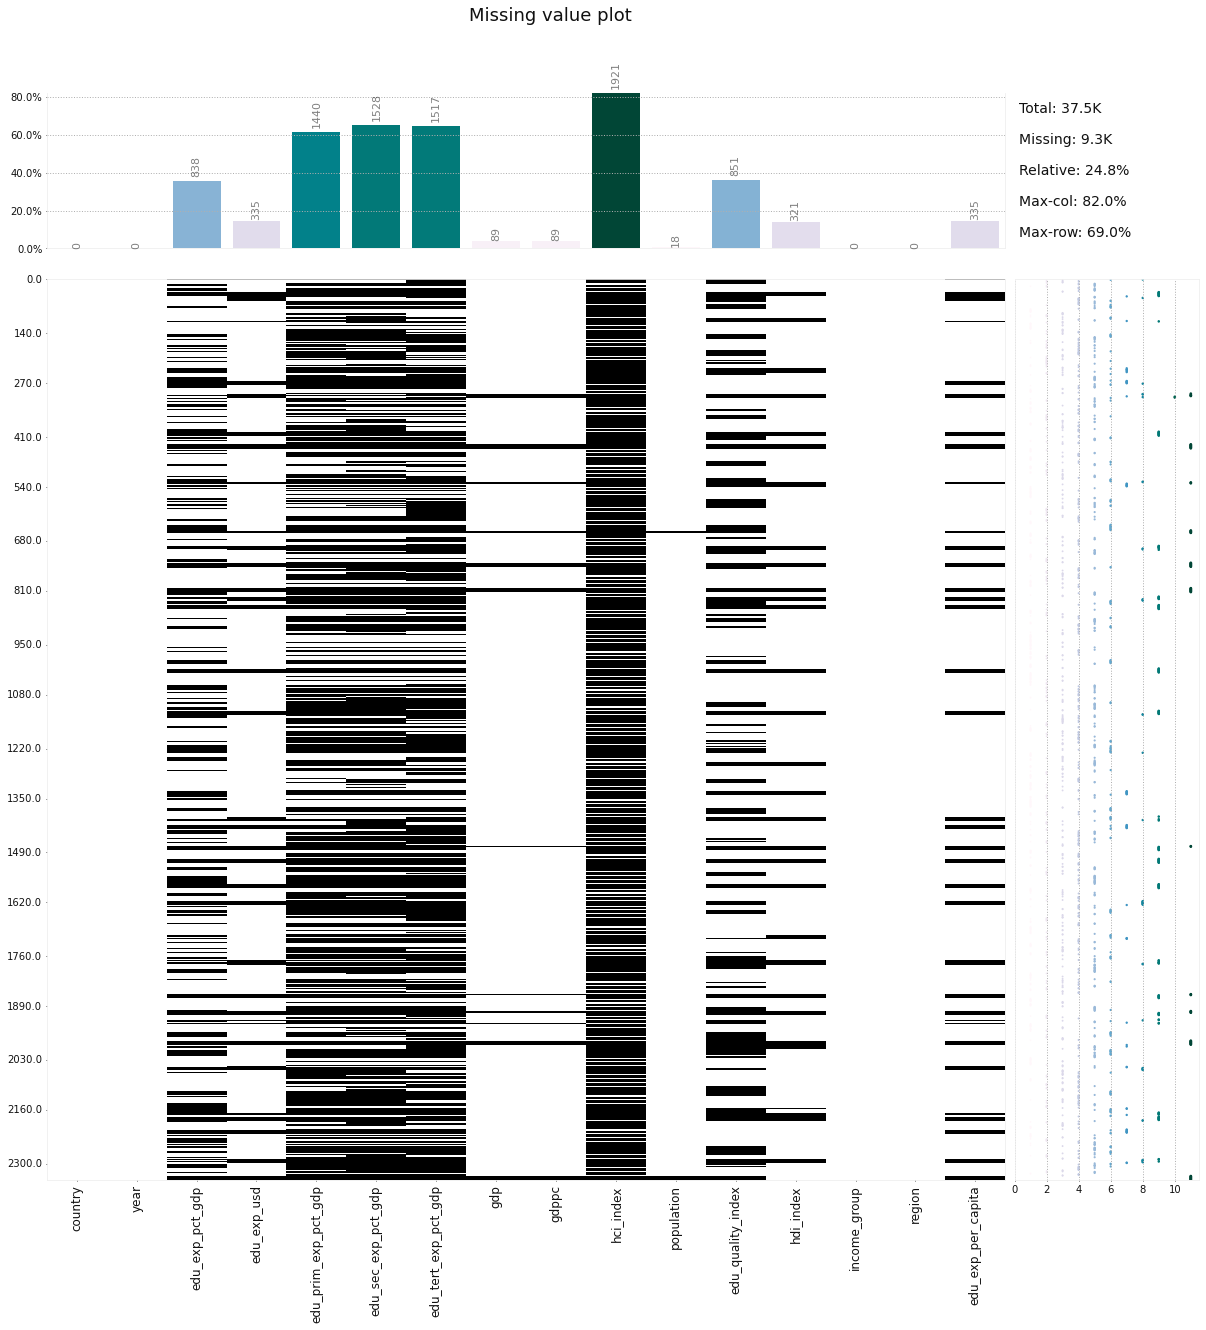

In [230]:
#Dropping years with lots of missing data
df_indicators = df_indicators[(df_indicators.year >= 2008) & (df_indicators.year <= 2018)]

#Visualizing missing data
klib.missingval_plot(df_indicators)

In [231]:
df_indicators.drop(columns=['edu_prim_exp_pct_gdp','edu_sec_exp_pct_gdp','edu_tert_exp_pct_gdp'],inplace = True)
df_indicators_2018 = df_indicators[df_indicators.year == 2018]


In [232]:
df_indicators[(df_indicators.country == 'Egypt') | (df_indicators.country == 'New Zealand')]

,country,year,edu_exp_pct_gdp,edu_exp_usd,gdp,gdppc,hci_index,population,edu_quality_index,hdi_index,income_group,region,edu_exp_per_capita
1666,Egypt,2008,3.76083,7.242098e+09,1.628182e+11,2044.527804,NaN,79636081.0,3.032582,0.660,Lower middle income,Middle East & North Africa,90.939907
1667,Egypt,2009,NaN,8.350305e+09,1.891470e+11,2331.268840,NaN,81134789.0,2.685391,0.662,Lower middle income,Middle East & North Africa,102.918920
1668,Egypt,2010,3.54265,9.467114e+09,2.189837e+11,2645.968759,0.478853,82761244.0,2.869702,0.668,Lower middle income,Middle East & North Africa,114.390664
1669,Egypt,2011,3.34430,1.014294e+10,2.359897e+11,2791.810766,NaN,84529251.0,2.924906,0.671,Lower middle income,Middle East & North Africa,119.993281
1670,Egypt,2012,3.36830,1.202636e+10,2.791167e+11,3229.685630,NaN,86422240.0,2.740733,0.677,Lower middle income,Middle East & North Africa,139.158167
1671,Egypt,2013,4.12253,1.239650e+10,2.884341e+11,3262.657586,NaN,88404652.0,2.573859,0.683,Lower middle income,Middle East & North Africa,140.224499
1672,Egypt,2014,4.25139,1.315984e+10,3.055954e+11,3379.557986,NaN,90424668.0,2.345346,0.685,Lower middle income,Middle East & North Africa,145.533776
1673,Egypt,2015,3.93085,1.427731e+10,3.293666e+11,3562.932658,NaN,92442549.0,2.267891,0.691,Lower middle income,Middle East & North Africa,154.445263
1674,Egypt,2016,NaN,1.446717e+10,3.324417e+11,3519.873240,NaN,94447071.0,2.458142,0.696,Lower middle income,Middle East & North Africa,153.177526
1675,Egypt,2017,NaN,1.019698e+10,2.357337e+11,2444.290387,0.486000,96442590.0,2.458142,0.698,Lower middle income,Middle East & North Africa,105.731073


In [233]:
df_indicators_encoded = df_indicators.copy()
df_indicators_encoded['country'] = df_indicators_encoded['country'].astype('category').cat.codes
df_indicators_encoded['income_group'] = df_indicators_encoded['income_group'].astype('category').cat.codes
df_indicators_encoded['region'] = df_indicators_encoded['region'].astype('category').cat.codes

## Data Imputation

In [234]:
kernel = mf.ImputationKernel(df_indicators_encoded, datasets=6, random_state=1)

kernel.mice(iterations=1, boosting='gbdt', min_sum_hessian_in_leaf=0.01)
df_indicators_imputed = kernel.complete_data(dataset=0, inplace=False)

In [235]:
df_indicators_imputed.country = df_indicators.country
df_indicators_imputed.region = df_indicators.region
df_indicators_imputed.income_group = df_indicators.income_group

In [236]:
df_indicators_imputed[(df_indicators_imputed.country == 'New Zealand') | (df_indicators_imputed.country == 'Egypt')]

,country,year,edu_exp_pct_gdp,edu_exp_usd,gdp,gdppc,hci_index,population,edu_quality_index,hdi_index,income_group,region,edu_exp_per_capita
1666,Egypt,2008,3.76083,7.242098e+09,1.628182e+11,2044.527804,0.479000,79636081.0,3.032582,0.660,Lower middle income,Middle East & North Africa,90.939907
1667,Egypt,2009,3.96523,8.350305e+09,1.891470e+11,2331.268840,0.490000,81134789.0,2.685391,0.662,Lower middle income,Middle East & North Africa,102.918920
1668,Egypt,2010,3.54265,9.467114e+09,2.189837e+11,2645.968759,0.478853,82761244.0,2.869702,0.668,Lower middle income,Middle East & North Africa,114.390664
1669,Egypt,2011,3.34430,1.014294e+10,2.359897e+11,2791.810766,0.484796,84529251.0,2.924906,0.671,Lower middle income,Middle East & North Africa,119.993281
1670,Egypt,2012,3.36830,1.202636e+10,2.791167e+11,3229.685630,0.490000,86422240.0,2.740733,0.677,Lower middle income,Middle East & North Africa,139.158167
1671,Egypt,2013,4.12253,1.239650e+10,2.884341e+11,3262.657586,0.492512,88404652.0,2.573859,0.683,Lower middle income,Middle East & North Africa,140.224499
1672,Egypt,2014,4.25139,1.315984e+10,3.055954e+11,3379.557986,0.500000,90424668.0,2.345346,0.685,Lower middle income,Middle East & North Africa,145.533776
1673,Egypt,2015,3.93085,1.427731e+10,3.293666e+11,3562.932658,0.508000,92442549.0,2.267891,0.691,Lower middle income,Middle East & North Africa,154.445263
1674,Egypt,2016,3.58728,1.446717e+10,3.324417e+11,3519.873240,0.508000,94447071.0,2.458142,0.696,Lower middle income,Middle East & North Africa,153.177526
1675,Egypt,2017,3.91249,1.019698e+10,2.357337e+11,2444.290387,0.486000,96442590.0,2.458142,0.698,Lower middle income,Middle East & North Africa,105.731073


GridSpec(6, 6)

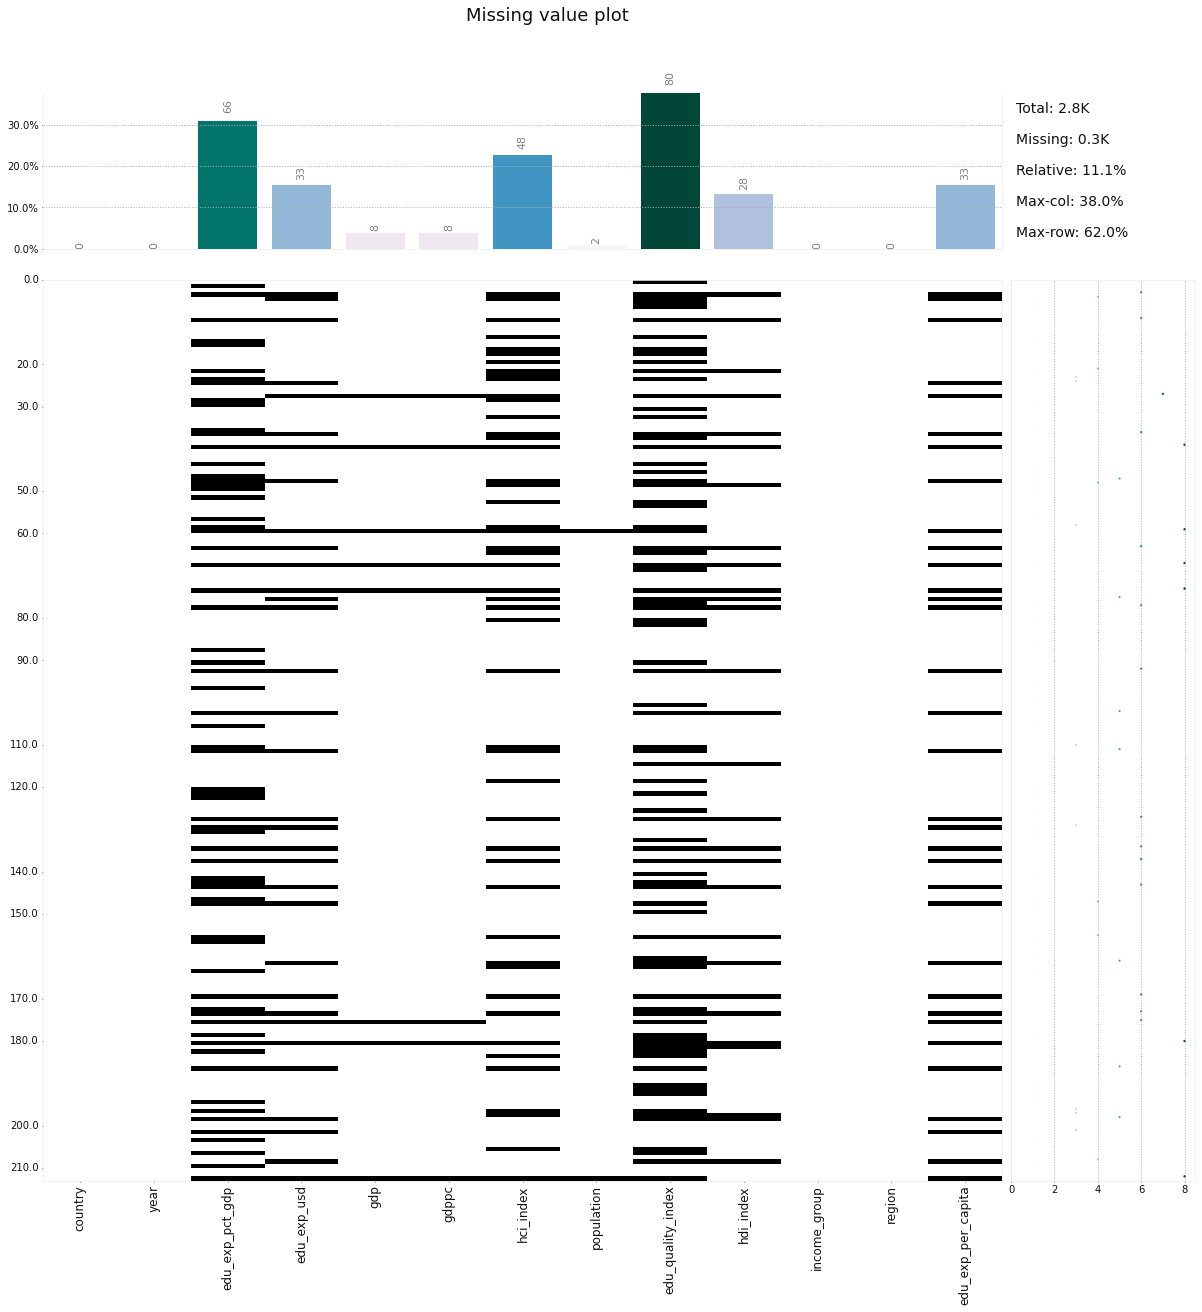

In [237]:
klib.missingval_plot(df_indicators_2018)

## Write the excel for the next step

In [238]:
#Save the dataframe to bue used in the analysis
writer = pd.ExcelWriter('data/country_indicators.xlsx')
df_indicators.to_excel(writer,sheet_name='data')
df_indicators_2018.to_excel(writer,sheet_name='data_2018')
df_indicators_imputed.to_excel(writer,sheet_name='data_imputed')
df_indicators_imputed[df_indicators_imputed.year == 2018].to_excel(writer,sheet_name='data_2018_imputed')
writer.save()